In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data from the CSV file
data = pd.read_excel("ALL_DATA.xlsx")

In [46]:
df = pd.DataFrame(data)

In [47]:

# Extract data from "Postal Code" column
def extract_postal_code(postal_code):
    if isinstance(postal_code, str) and any(char.isdigit() for char in postal_code):
        return ''.join(char for char in postal_code if not char.isdigit())
    return postal_code

df["Region Postal Code"] = df["Postal Code"].apply(extract_postal_code)

# List of keywords to filter out. These are error after extract_postal_code
keywords_to_filter = ["Dartford", "London", "Egham", "Enfield", "George", "Greater", "London", "instagram", "st"]

# Filter out rows based on keywords in the "Modified Postal Code" column
df = df[~df["Region Postal Code"].str.contains('|'.join(keywords_to_filter), case=False, na=False)]

# Mapping dictionary
region_mapping = {
    'WCB':'West Central', 'WCR':'West Central', 'ECN':'East Central', 'WCX':'West Central', 
    'WCH':'West Central', 'WCE':'West Central', 'WCN':'West Central', 'WCA':'West Central', 'WCV':'West Central',
    'ECA':'East Central', 'ECN':'East Central', 'ECM':'East Central', 'ECV':'East Central', 'ECR':'East Central', 'ECY':'East Central',
    'WB':'West', 'WK':'West', 'WT':'West', 'WS':'West', 'WF':'West', 'WU':'West', 'W':'West', 'WD':'West', 'WW':'West', 'WG':'West', 'WC':'West',
    'E':'East',
    'SWA':'South West', 'SWY':'South West', 'SWW':'South West', 'SWX':'South West', 'SWH':'South West', 'SWP':'South West', 'SWE':'South West', 'SWV':'South West',
    'NW':'North West',
    'N':'North',
    'SE':'South East', 'SS':'South East', 'TN':'South East', 'CR':'South East', 'DA':'South East', 'RM':'South East', 'BR':'South East', 'SM':'South East', 'KT':'South East',
    'SW':'South West', 'SWA':'South West', 'SWW':'South West', 'SWX':'South West', 'SWY':'South West', 'SWH':'South West', 'SWP':'South West', 'SWE':'South West', 'SWV':'South West', 'TW':'South West',
    "CM":"Outer London", "EN":"Outer London", "EW":"Outer London", "HA":"Outer London", "IG":"Outer London", "LU":"Outer London", "NC":"Outer London", "RG":"Outer London", "RH":"Outer London", "UB":"Outer London", "WH":"Outer London", "WJ":"Outer London", "DN":"Outer London"
}

# Replace values using the mapping
df['Region'] = df['Region Postal Code'].replace(region_mapping)

df

,Query,Restaurant,Address,Rating,Num Ratings,User,Review Rating,Review,Time,Postal Code,Region Postal Code,Region
0,Afternoon tea in London,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,Kar,4,It was a lovely experience. The teas were amaz...,a month ago,W1B,WB,West
1,Afternoon tea in London,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,Catherine,5,"Exquisite interior, lovely ambiance, delectabl...",3 months ago,W1B,WB,West
2,Afternoon tea in London,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,Logan Lankford,5,You pay for what you get! My wife and I told o...,2 weeks ago,W1B,WB,West
3,Afternoon tea in London,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,Kate Nguyen,5,"We went there for Afternoon Tea, one of the tr...",5 months ago,W1B,WB,West
4,Afternoon tea in London,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,Justin Ocampo,5,What an amazing experience of Afternoon Tea! H...,2 months ago,W1B,WB,West
...,...,...,...,...,...,...,...,...,...,...,...,...
44715,Vietnamese restaurants London,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,Scott C,5,Viet Grill is an incredibly underrated Vietnam...,in the last week,E2,E,East
44716,Vietnamese restaurants London,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,A W,5,Party of 5 on a Wednesday night. The place was...,a month ago,E2,E,East
44717,Vietnamese restaurants London,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,Jouls W,4,Dropped into this place before and after an ev...,2 months ago,E2,E,East
44718,Vietnamese restaurants London,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,Christine Kim,4,"Decent, local Vietnamese restaurant. Between t...",4 months ago,E2,E,East


In [48]:
# GENERATE RESTAURANT_ID AND USER_ID
import random
import uuid
# Keep track of generated Restaurant_ID values for unique combinations
generated_ids = {}
def generate_unique_restaurant_id(restaurant_data):
    unique_identifier = (restaurant_data['Restaurant'], restaurant_data['Address'], restaurant_data['Rating'])
    
    if unique_identifier in generated_ids:
        return generated_ids[unique_identifier]
    else:
        new_id = str(random.randint(1000000, 9999999))
        generated_ids[unique_identifier] = new_id
        return new_id
# Generate unique User_ID values using UUID
user_ids = [str(uuid.uuid4()) for _ in range(len(df))]
df.insert(df.columns.get_loc('User'), 'User_ID', user_ids)
# Generate unique Restaurant_ID values based on the unique combinations of Restaurant, Address, and Rating
restaurant_ids = [generate_unique_restaurant_id(row) for _, row in df.iterrows()]
df.insert(df.columns.get_loc('Restaurant'), 'Restaurant_ID', restaurant_ids)
df.to_excel('ALL_DATA_with_User_Restaurant_ID.xlsx', index=False)

In [49]:
df

,Query,Restaurant_ID,Restaurant,Address,Rating,Num Ratings,User_ID,User,Review Rating,Review,Time,Postal Code,Region Postal Code,Region
0,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,61266865-f87a-494c-93a2-863521c90889,Kar,4,It was a lovely experience. The teas were amaz...,a month ago,W1B,WB,West
1,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,be50e997-8ab0-4a31-90f6-365a628f0564,Catherine,5,"Exquisite interior, lovely ambiance, delectabl...",3 months ago,W1B,WB,West
2,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,4b13041d-7f2a-43c7-9f73-95329ece9ad4,Logan Lankford,5,You pay for what you get! My wife and I told o...,2 weeks ago,W1B,WB,West
3,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,f79a43dc-0a37-4247-ba10-91151fc08054,Kate Nguyen,5,"We went there for Afternoon Tea, one of the tr...",5 months ago,W1B,WB,West
4,Afternoon tea in London,3721442,Afternoon Tea at Café Royal,"Café Royal, 68 Regent St., London W1B 4DY, Uni...",4.7,310,bfbccc75-b85d-4825-8d90-f59a0b1172ec,Justin Ocampo,5,What an amazing experience of Afternoon Tea! H...,2 months ago,W1B,WB,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44715,Vietnamese restaurants London,4077196,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,7d4e69c0-e748-4d4c-8662-867d765223dc,Scott C,5,Viet Grill is an incredibly underrated Vietnam...,in the last week,E2,E,East
44716,Vietnamese restaurants London,4077196,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,9bcdfe1c-9a61-47a0-8f5c-b53c2720f9c9,A W,5,Party of 5 on a Wednesday night. The place was...,a month ago,E2,E,East
44717,Vietnamese restaurants London,4077196,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,2f8461d8-7e7e-4be6-8d74-0414fd3c124a,Jouls W,4,Dropped into this place before and after an ev...,2 months ago,E2,E,East
44718,Vietnamese restaurants London,4077196,Viet Grill,"58 Kingsland Rd, London E2 8DP, United Kingdom",4.0,734,ae693150-78e9-4971-9b36-1d4cfd34b4de,Christine Kim,4,"Decent, local Vietnamese restaurant. Between t...",4 months ago,E2,E,East


Region
South East      2174
South West      1287
East            1123
Outer London    1018
West             856
North            805
North West       681
East Central     469
West Central     380
Name: Restaurant, dtype: int64


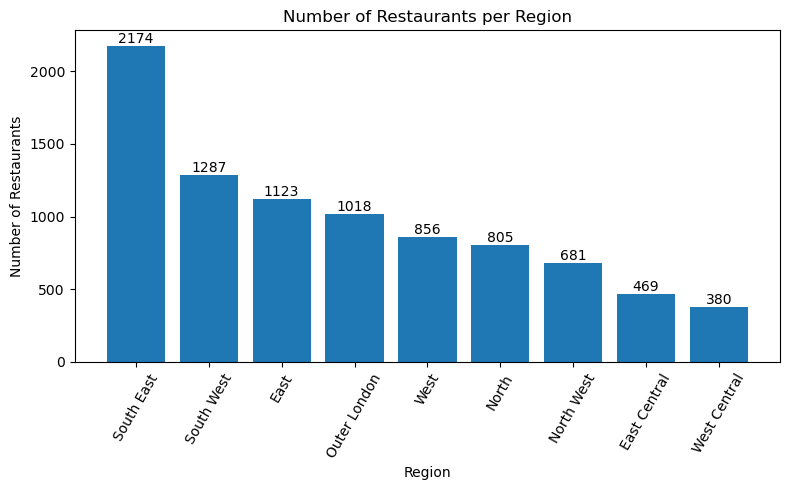

In [90]:
# Group by postal code and count unique restaurants
restaurant_count_by_postal_code = df.groupby('Region')['Restaurant'].nunique()

# Sort the Series in descending order
restaurant_count_by_postal_code = restaurant_count_by_postal_code.sort_values(ascending=False)
print(restaurant_count_by_postal_code)
# Set the figure size for a wider chart
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Create a bar chart
bars = plt.bar(restaurant_count_by_postal_code.index, restaurant_count_by_postal_code.values)
plt.xlabel('Region')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants per Region')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability

# Add data labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()

# Show the plot
plt.show()

Region
North           4.34
West            4.29
South West      4.27
East Central    4.26
West Central    4.25
North West      4.24
East            4.23
South East      4.21
Outer London    4.18
Name: Rating, dtype: float64


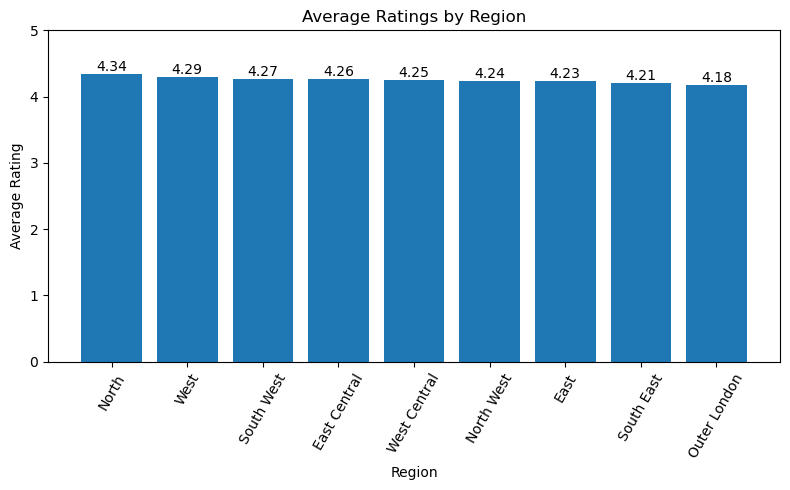

In [51]:
# Calculate average ratings by Region Postal Code 
average_ratings_by_region = round(df.groupby('Region')['Rating'].mean(), 2)
# Sort the values in decreasing order
average_ratings_by_region = average_ratings_by_region.sort_values(ascending=False)
print(average_ratings_by_region)
# Set the figure size for a wider chart
plt.figure(figsize=(8, 5))  # Adjust width and height as needed
# Create a bar chart for average ratings
bars_avg = plt.bar(average_ratings_by_region.index, average_ratings_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Region')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
# Set the y-axis limit to 5
plt.ylim(0, 5)
# Add data labels above the bars
for bar in bars_avg:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')
# Show the plot
plt.tight_layout()
plt.show()

In [52]:
# Calculate the average rating for all restaurants
average_rating = df['Rating'].mean()
print("Average Rating:", average_rating)

Average Rating: 4.243579583613187


In [53]:
# Group by Region and calculate metrics
region_grouped = df.groupby(['Region']).agg({
    'Rating': lambda x: round(x.mean(), 2),  # Calculate and round average rating to 2 decimal places
    'Num Ratings': 'sum'                     # Calculate total number of ratings
}).reset_index()
region_grouped = region_grouped.sort_values(by='Rating', ascending=False)

# Display the grouped and aggregated data
region_grouped

,Region,Rating,Num Ratings
2,North,4.34,1730692
7,West,4.29,3999971
6,South West,4.27,3215829
1,East Central,4.26,2013033
8,West Central,4.25,2180166
3,North West,4.24,1555782
0,East,4.23,3022326
5,South East,4.21,4181563
4,Outer London,4.18,2515707


## The dataframe all restaurant

In [72]:
# Select the desired columns
selected_columns = ['Restaurant_ID', 'Restaurant', 'Rating', 'Num Ratings', 'Region']
# Create a new DataFrame with the selected columns
restaurant_data = df[selected_columns]
# Remove duplicate entries
restaurant_data = restaurant_data.drop_duplicates()
# Calculate the average of 'Num Ratings' for all restaurants
average_num_ratings = round(restaurant_data['Num Ratings'].mean())
average_num_ratings

547

In [73]:
restaurant_data

,Restaurant_ID,Restaurant,Rating,Num Ratings,Region
0,3721442,Afternoon Tea at Café Royal,4.7,310,West
5,8411486,Afternoon Tea at Claridge's,4.8,100,West
10,4960868,Afternoon Tea at Corinthia London,4.5,203,South West
15,2458185,Afternoon Tea at Flemings Mayfair London Hotel,4.2,6,Outer London
20,4321787,Afternoon Tea at The Chesterfield Mayfair Hotel,4.5,164,Outer London
...,...,...,...,...,...
44695,6753928,Nom Nom Restaurant,4.7,420,East
44700,1338474,Pho Brunch,4.6,201,East
44705,3400623,Sông Quê Café,4.2,1484,East
44710,7185282,Tay Do Restaurant (Kingsland Road),4.5,55,East


In [77]:
# Remove duplicate rows based on Restaurant_ID, Restaurant, Rating, and Region columns
deduplicated_data = restaurant_data.drop_duplicates(subset=['Restaurant_ID', 'Restaurant', 'Rating', 'Region'])
# Sort the DataFrame by 'Num Ratings' column in descending order and select the top 10 rows
top_10_restaurants = deduplicated_data.sort_values(by='Num Ratings', ascending=False).head(10)
# Reset the index to start from 1
top_10_restaurants.reset_index(drop=True, inplace=True)
# Display the top 10 restaurants
top_10_restaurants

,Restaurant_ID,Restaurant,Rating,Num Ratings,Region
0,1450316,Sky Garden,4.6,52683,East Central
1,6881431,Dishoom Shoreditch,4.7,16525,East
2,2317018,Hard Rock Cafe,4.4,15695,West
3,1590120,Circolo Popolare,4.7,14512,West
4,4574322,Gloria,4.8,10992,East Central
5,1658708,Royal Nawaab Perivale,4.0,10030,Outer London
6,3498661,Duck & Waffle London,4.2,9691,East Central
7,4464189,Ave Mario,4.8,9213,West Central
8,1916449,Dishoom Covent Garden,4.5,8891,West Central
9,4216871,Anchor Bankside,4.2,8204,South East


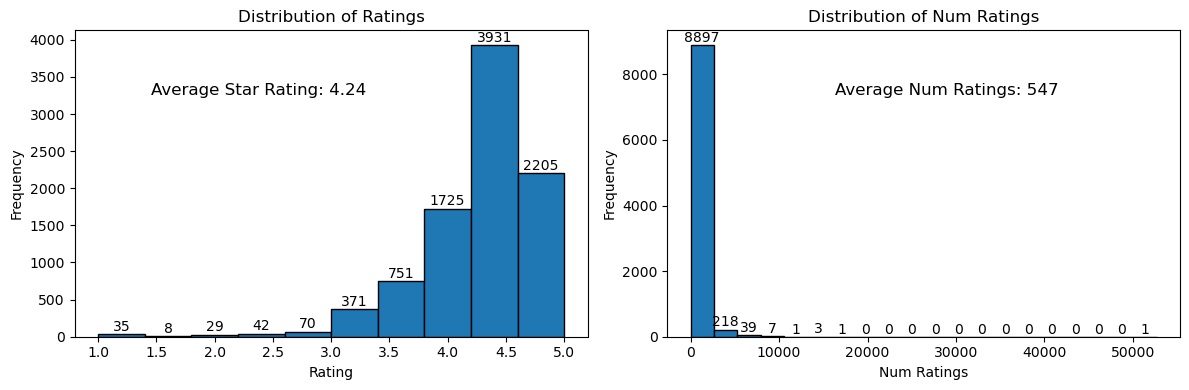

In [58]:
# Calculate the average number of ratings and the average star rating
avg_num_ratings = restaurant_data['Num Ratings'].mean()
avg_star_rating = restaurant_data['Rating'].mean()
# Create subplots for histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Histogram for 'Rating'
n, bins, patches = axs[0].hist(restaurant_data['Rating'], bins=10, edgecolor='black')
axs[0].set_title('Distribution of Ratings')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')
# Add text annotations to the 'Rating' histogram bars
for i in range(len(patches)):
    axs[0].text(
        patches[i].get_x() + patches[i].get_width() / 2,
        patches[i].get_height() + 5,  # Adjust the vertical position of the text
        int(n[i]),
        ha='center',
        va='bottom'
    )
# Histogram for 'Num Ratings'
n, bins, patches = axs[1].hist(restaurant_data['Num Ratings'], bins=20, edgecolor='black')
axs[1].set_title('Distribution of Num Ratings')
axs[1].set_xlabel('Num Ratings')
axs[1].set_ylabel('Frequency')
# Add text annotations to the 'Num Ratings' histogram bars
for i in range(len(patches)):
    axs[1].text(
        patches[i].get_x() + patches[i].get_width() / 2,
        patches[i].get_height() + 5,  # Adjust the vertical position of the text
        int(n[i]),
        ha='center',
        va='bottom'
    )
# Add annotations for average number of ratings and average star rating
plt.figtext(0.70, 0.75, f'Average Num Ratings: {avg_num_ratings:.0f}', fontsize=12)
plt.figtext(0.13, 0.75, f'Average Star Rating: {avg_star_rating:.2f}', fontsize=12)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

In [61]:
# Calculate the average of all ratings
average_rating = round(restaurant_data['Num Ratings'].mean())
# Calculate average number of ratings for restaurants with Rating < 3
avg_ratings_lt_3 = round(restaurant_data[restaurant_data['Rating'] < 3]['Num Ratings'].mean())
# Calculate average number of ratings for restaurants with Rating >= 3
avg_ratings_ge_3 = round(restaurant_data[restaurant_data['Rating'] >= 3]['Num Ratings'].mean())
print("Average Num Ratings of All Restaurants:", average_rating)
print("Average Num Ratings for Restaurants with Rating < 3:", avg_ratings_lt_3)
print("Average Num Ratings for Restaurants with Rating >= 3:", avg_ratings_ge_3)

Average Num Ratings of All Restaurants: 547
Average Num Ratings for Restaurants with Rating < 3: 86
Average Num Ratings for Restaurants with Rating >= 3: 556


In [88]:
filtered_restaurants = df[(df['Num Ratings'] > 300) & (df['Rating'] <= 3)]
result_df = filtered_restaurants[['Restaurant_ID', 'Restaurant', 'Num Ratings', 'Rating']]
result_df = result_df.drop_duplicates()
result_df.reset_index(drop=True, inplace=True)
result_df

,Restaurant_ID,Restaurant,Num Ratings,Rating
0,9807809,Domino's Pizza - London - Bow,310,2.6
1,1083097,Domino's Pizza - London - Elephant and Castle,462,2.4
2,7968461,KFC Bethnal Green,917,2.9
3,5688048,KFC Hackney - Mare Street,497,2.8
4,9141726,KFC London - Kings Cross,539,2.9
5,5885627,KFC Whitechapel - High Street,799,2.9
6,4818806,KFC Croydon - Lower Addiscombe Road,479,3.0
7,9128594,Burger MaxX,388,2.9
8,2656139,KFC Earlsfield - Garratt Lane,311,2.9
9,8805710,KFC Harrow Weald - High Road,1665,3.0
